In [2]:
import pandas as pd


from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [319]:
auto=pd.read_csv('./auto_insurance/train.csv').drop('id', axis=1)

In [320]:
auto.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## EDA

In [321]:
auto.shape

(381109, 11)

## Convert categorical to numerical 

In [322]:

auto['Gender'] = auto['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [323]:

auto['Vehicle_Damage'] = auto['Vehicle_Damage'].map( {'Yes': 1, 'No': 0} ).astype(int)

## Assigned dummies 

In [324]:
auto=pd.get_dummies(auto, columns=['Vehicle_Age'])

In [325]:
auto.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


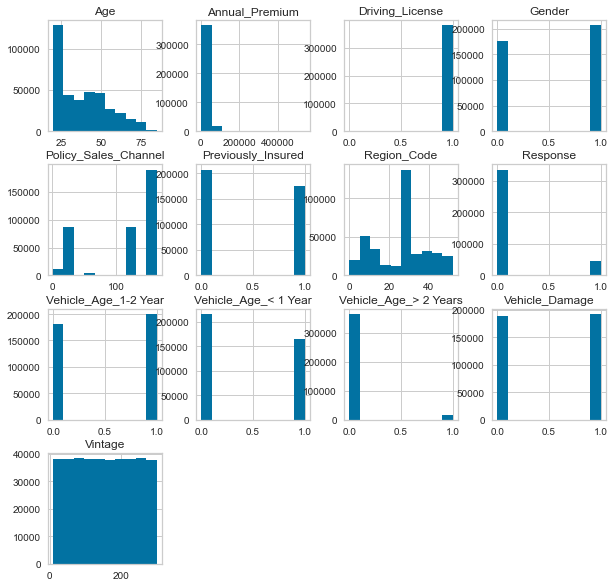

In [326]:
auto.hist(figsize=(10, 10));

In [327]:
auto.shape

(381109, 13)

## Pick Response=1/Yes and Region_Code=28/Nevada

In [328]:
#auto_1=auto[(auto.Response==1) & (auto.Region_Code==28)]
auto_1=auto[auto['Response']==1]
auto_1.shape

(46710, 13)

## Outliers detection and removal

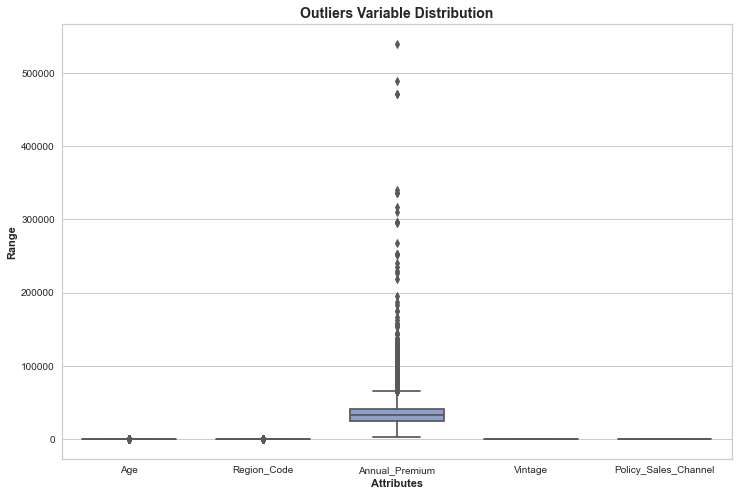

In [329]:
attributes = ['Age','Region_Code','Annual_Premium','Vintage', 'Policy_Sales_Channel']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = auto_1[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [330]:
# Removing (statistical) outliers for Annual_Premium
cols = [ 'Annual_Premium'] # one or more

Q1 = auto_1[cols].quantile(0.25)
Q3 = auto_1[cols].quantile(0.75)
IQR = Q3 - Q1

auto_1 = auto_1[~((auto_1[cols] < (Q1 - 1.5 * IQR)) |(auto_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

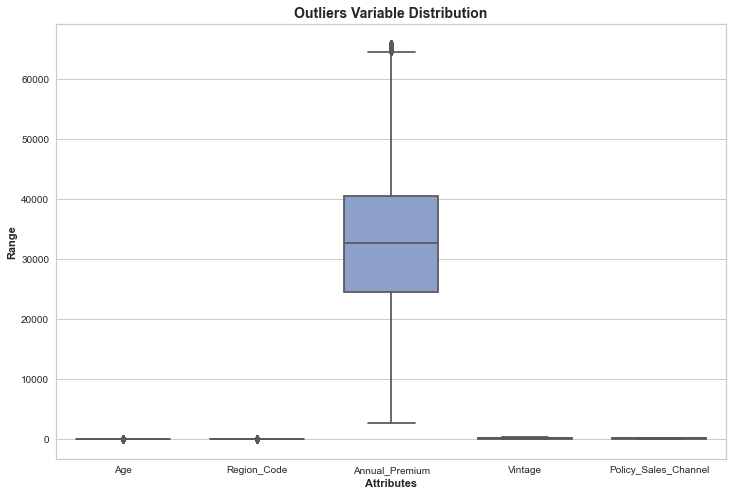

In [331]:
attributes = ['Age','Region_Code','Annual_Premium','Vintage', 'Policy_Sales_Channel']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = auto_1[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [332]:
corr = auto_1.corr()


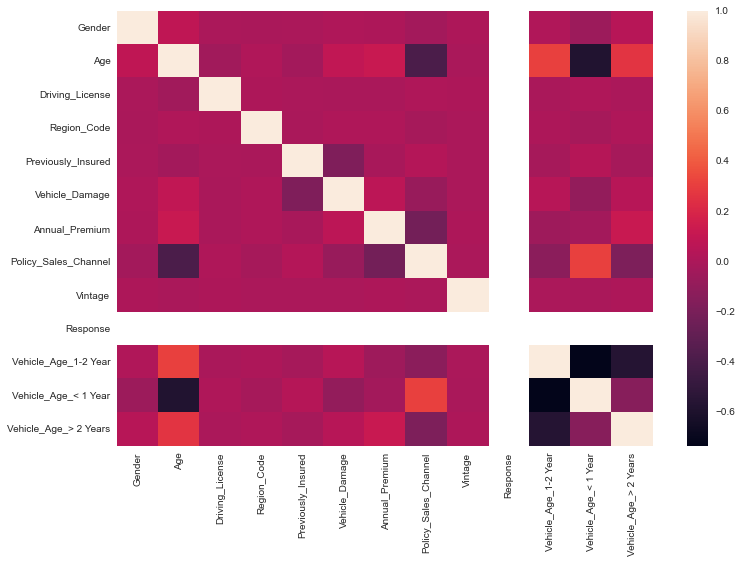

In [333]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

## Dropping Vintage(uniformly distr), Response, Driving_License

In [334]:
X=auto_1.drop(['Driving_License','Response','Vintage'], axis=1)
X.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,28.0,0,1,40454.0,26.0,0,0,1
2,1,47,28.0,0,1,38294.0,26.0,0,0,1
7,0,56,28.0,0,1,32031.0,26.0,1,0,0
10,0,47,35.0,0,1,47576.0,124.0,1,0,0
15,1,37,6.0,0,1,2630.0,156.0,1,0,0


## Scaling with StandardScaling

In [335]:
scale=StandardScaler()
scaled_X=scale.fit_transform(X)
scaled_X.shape

(45599, 10)

## PCA

In [336]:
pca_auto_1=PCA().fit(scaled_X)

## Scree plot

(-1.1668560239901755, 28.33712047980351)

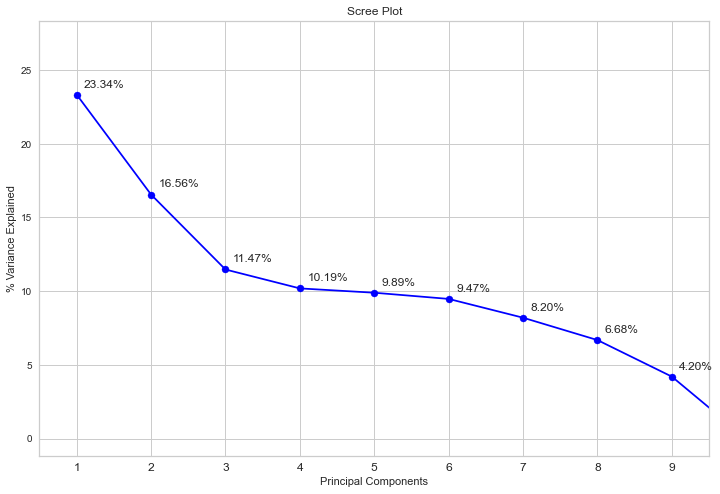

In [337]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))

num_components = pca_auto_1.n_components_
idx = np.arange(num_components)
vals = pca_auto_1.explained_variance_ratio_*100

ax.plot(idx, vals, color='blue')
ax.scatter(idx, vals, color='blue', s=50)

for i in range(9):
    ax.annotate(r"{:2.2f}%".format(vals[i]), (idx[i]+0.1, vals[i]+0.5))

ax.set_title('Scree Plot')
ax.set_xlabel('Principal Components')
ax.set_ylabel('% Variance Explained')

ax.set_xticklabels(idx+1, fontsize=12)
ax.set_xticks(np.arange(9))
ax.set_xlim(left=0-0.5, right=8+0.5)
ax.set_ylim(top=max(vals)+5)
# plt.savefig('../imgs/scree-1.png')

In [338]:
# Creates  PCA models with only the first three  principal components.
pca = PCA(n_components=3) #pca object
X_pca = pca.fit_transform(scaled_X) 

In [339]:
# Changes PC arrays into dataframes.
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df.shape

(45599, 3)

In [340]:
evr = pca.explained_variance_ratio_
print(evr)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(evr.sum()*100))

[0.2333712  0.16555213 0.11469524]
The 2 principal components explain 51.4% of the variance in the original data.


## Silhouette_scores 
**is a method of validation and interpretation of consistency within clusters of data.**
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [219]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [341]:
sc=[]
K=range(2,10)
for k in K:
    kmeans=KMeans(n_clusters=k).fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, sample_size=300)
    sc.append(score)
    

''

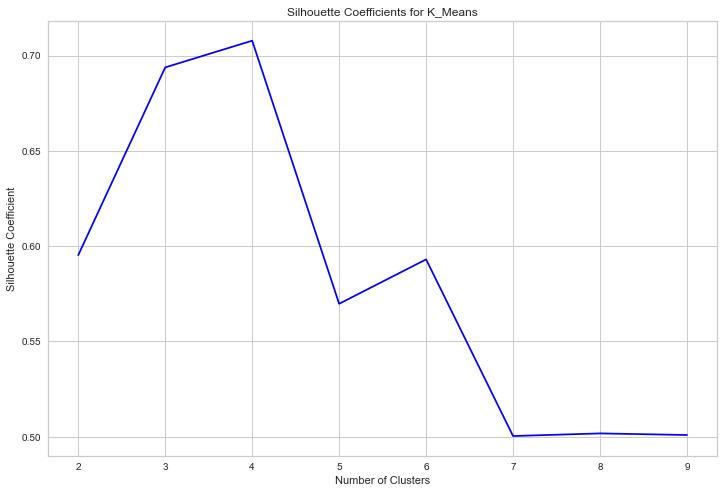

In [342]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(2, 10), sc, color='blue')

ax.set_title('Silhouette Coefficients for K_Means')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Coefficient')
# plt.savefig('../imgs/sil-coef-1.png')
;

In [222]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans

In [343]:
kmeans_model_3 = KMeans(n_clusters=3, random_state=1).fit(X_pca)# score for 3 clasters
labels = kmeans_model_3.labels_
metrics.silhouette_score(X_pca, labels, sample_size=500)

0.6713349513966805

In [344]:
kmeans_model_4 = KMeans(n_clusters=4, random_state=1).fit(X_pca)#score for 4 clasters
labels = kmeans_model_4.labels_
metrics.silhouette_score(X_pca, labels, sample_size=500)

0.7157670014656388

**Clustering K=3** 


## Hopkins statistic 

- I started by checking **Hopkins statistics** in order to access the clusterability of the dataset. A score between 0 and 1, a score around 0.5 express no clusterability, and score tending to zero express high cluster tendency.

In [345]:
from pyclustertend import hopkins
hopkins(X_pca,150)

0.007304467995271452

## Evaluating number of clusters 
### Yellowbrick elbow method

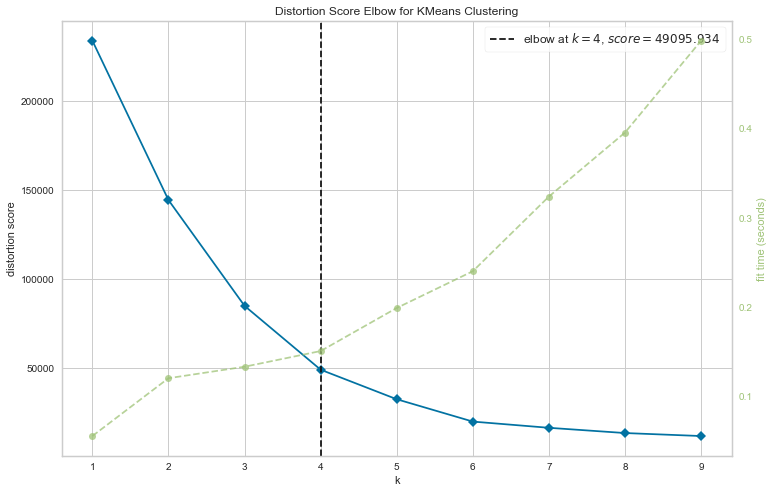

In [346]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visual=KElbowVisualizer(kmeans, k=(1,10))
visual.fit(X_pca)
visual.poof();

In [347]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X_pca)

KMeans(n_clusters=3, n_init=20)

In [348]:
km3.labels_

array([2, 2, 1, ..., 1, 1, 1], dtype=int32)

In [349]:
pd.Series(km3.labels_).value_counts()

1    34030
0     7087
2     4482
dtype: int64

In [350]:
km3.cluster_centers_

array([[ 3.19909987,  0.31688942, -0.21772787],
       [-0.63574451, -0.51406813, -0.00848826],
       [-0.23151166,  3.40203995,  0.40872224]])

In [381]:
df_km=pd.concat([df.reset_index().drop('index', axis=1), pd.Series(km3.labels_).reset_index().drop('index',axis=1)], axis=1)
df_km.columns=['PC1','PC2','PC3','ClusterID']

In [367]:
df_km.shape

(45599, 4)

In [353]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

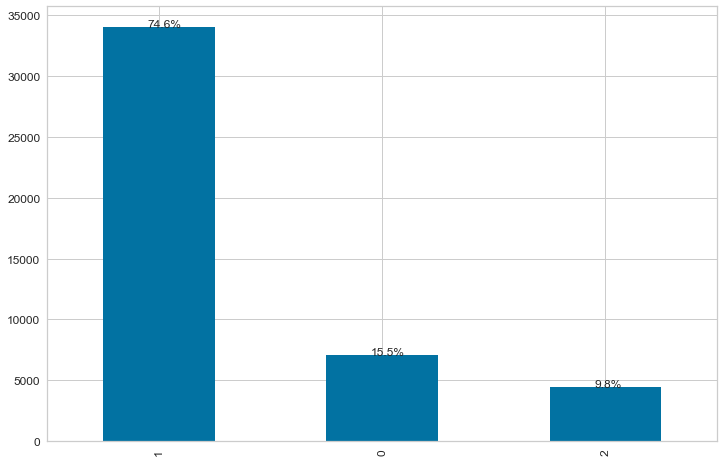

In [354]:
ax=df_km.ClusterID.value_counts().plot(kind='bar');
plt.xticks(size=12)
plt.yticks(size=12)
without_hue(ax, df_km.ClusterID)

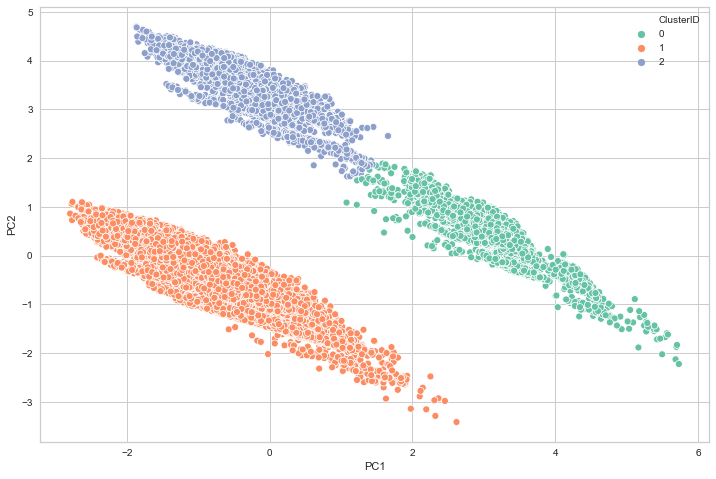

In [355]:
sns.scatterplot(x='PC1', y='PC2', hue='ClusterID', data=df_km, palette='Set2');

## Aggregating by Regions

In [356]:
autoYes=X.groupby('Region_Code',as_index=False).agg('mean')
autoYes.shape

(53, 10)

In [357]:
df_Region=X['Region_Code']
df_Region.shape

(45599,)

In [358]:
df_km.shape

(45599, 4)

In [382]:
# Viewing the dataset
df_temp = pd.concat([df_km,df_Region], axis = 1)
df_temp.head()


,PC1,PC2,PC3,ClusterID,Region_Code
0,-0.177514,3.574607,0.410008,2.0,28.0
1,-0.287342,3.583664,0.446774,2.0,NaN
2,-1.428585,-0.030464,-0.071373,1.0,28.0
3,-0.535565,-0.378423,-0.374714,1.0,NaN
4,0.336191,-1.532921,-0.014203,1.0,NaN


In [370]:
# Viewing the Cluster Profiling dataset
df_ClusterProfiling = pd.merge(autoYes, df_temp[['ClusterID', 'Region_Code']], on = 'Region_Code')
df_ClusterProfiling.head()


,Region_Code,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,ClusterID
0,0.0,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
1,0.0,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
2,0.0,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
3,0.0,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
4,0.0,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0


## Regions Renaming

In [372]:
df_ClusterProfiling['Region_Code'] = df_ClusterProfiling['Region_Code'].replace(to_replace=[8,15,28,46,41,0,1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18,19],
                                                                                value=['Columbia','Iowa','Nevada','Virginia','SDakota','Alabama','Alaska','Arizona','Arkanzas','California','Colorado','Connecticut','Delaware','Florida',
                                                                                'Georgia', 'Hawaii', 'Idaho','Illinois','Indiana','Kansas','Kentucky', 'Luisiana','Maine'])


In [373]:
df_ClusterProfiling.shape

(45599, 11)

In [375]:
df_ClusterProfiling.head()

,Region_Code,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,ClusterID
0,Alabama,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
1,Alabama,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
2,Alabama,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
3,Alabama,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0
4,Alabama,0.703488,49.296512,0.005814,1.0,4159.738372,60.186047,0.732558,0.017442,0.25,1.0


In [374]:
# Clustering the numerical columns by Cluster ID
# df_ClusterProfiling.set_index('ClusterID')

## Setting Clusters as Index

## Plotting

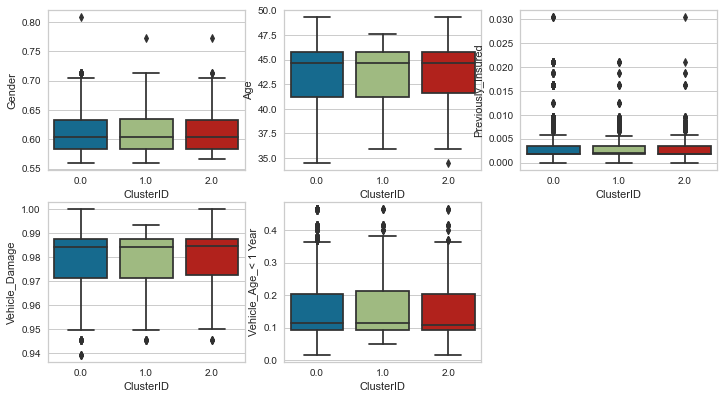

In [310]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (12,10))
var = [ 'Gender', 'Age', 'Previously_Insured','Vehicle_Damage','Vehicle_Age_< 1 Year']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

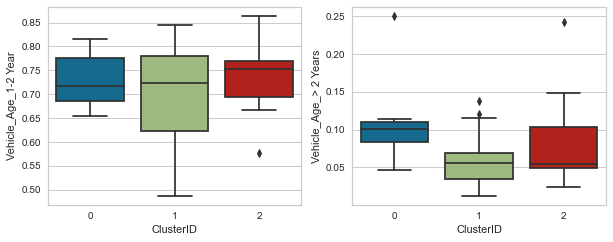

In [301]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (10,8))
var = [ 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

In [302]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==0]['Region_Code'].head()

0      0.0
1      1.0
25    25.0
26    26.0
42    42.0
Name: Region_Code, dtype: float64

In [305]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==1]['Region_Code'].head()

2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
Name: Region_Code, dtype: float64

In [304]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==2]['Region_Code'].head()

11    11.0
24    24.0
27    27.0
28    28.0
38    38.0
Name: Region_Code, dtype: float64

## Hierarcical clustering

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

In [383]:
df_short=df[:100]

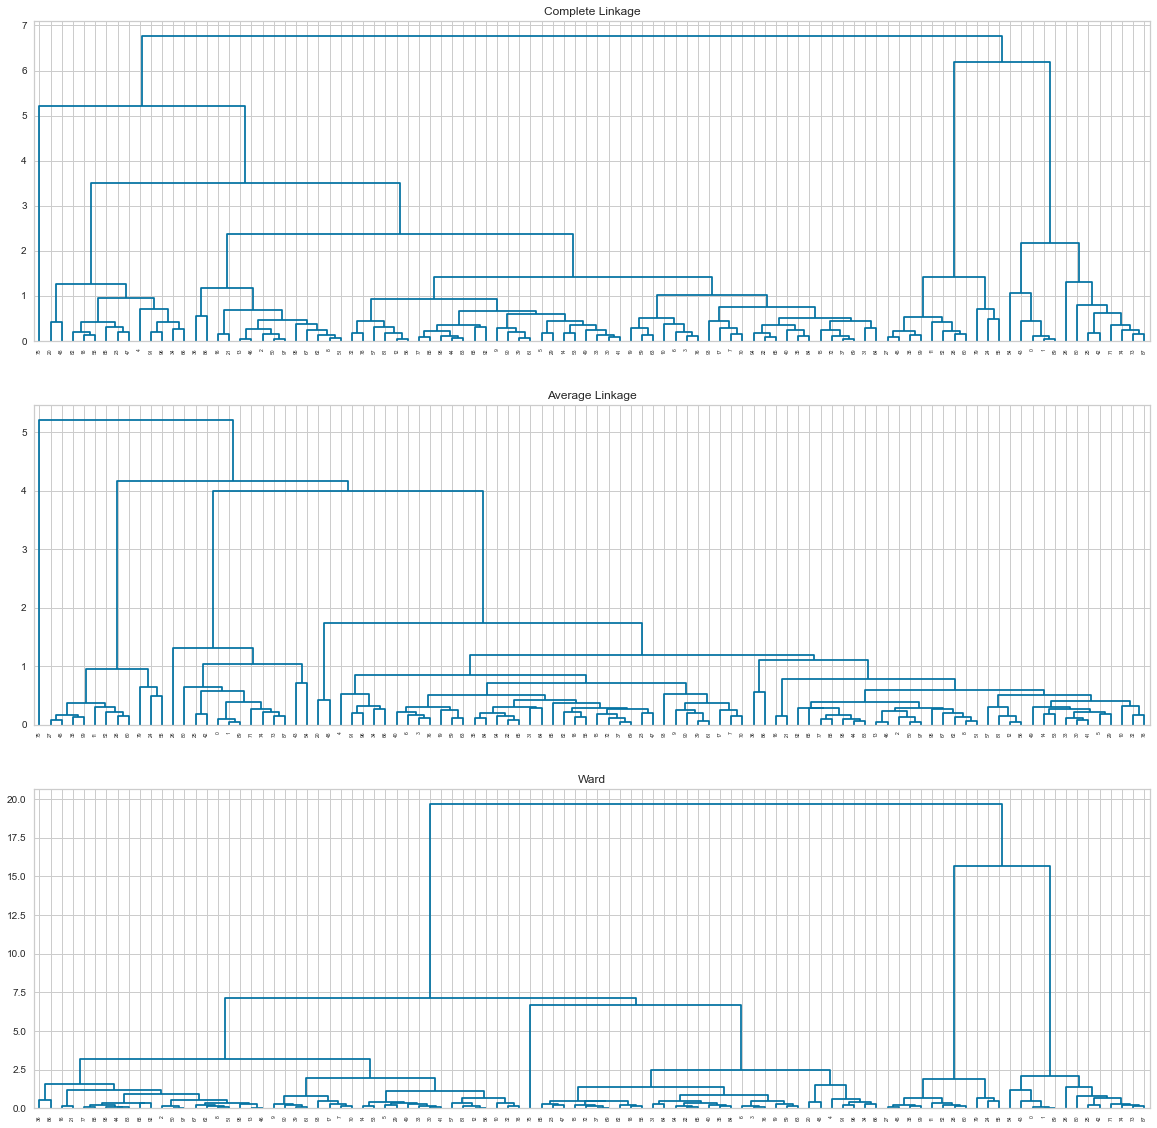

In [384]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(df_short), hierarchy.average(df_short),hierarchy.ward(df_short)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage,ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Ward');

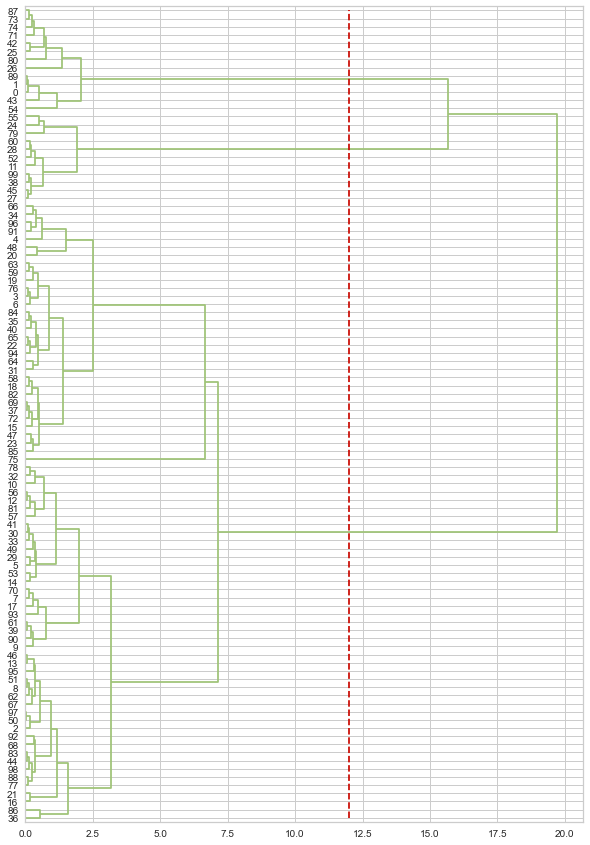

In [385]:
plt.figure(figsize=(10,15))
cut = hierarchy.dendrogram(hierarchy.ward(df_short),
                            orientation='right', color_threshold=40, leaf_font_size=10)
plt.vlines(12,5,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');